## Implémentation ds Algorithmes A* et Greedy-Best_Search sur le jeu du N_Puzzle (Taquin)

 ## *  Reprenez le jeu du Taquin vu en cours et définissez quelques heuristiques propres à ce jeu.

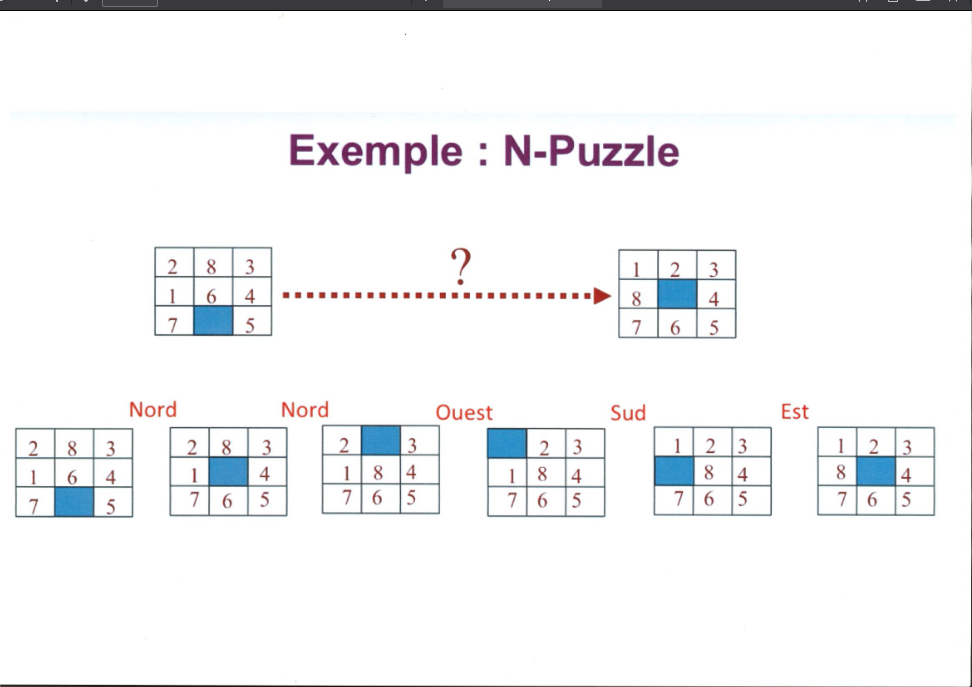

Le but du travail consiste à comparer les deux méthodes sur diverses configurations du jeu du taquin (3x3, 4x4, 5x5, etc) avec diverses situations initiales et finales et en appliquant les différentes heuristiques choisies.


La comparaison des deux méthodes se fera suivant les métriques suivantes:

    - Nombre de nœuds explorés avant de trouver la solution.
    - Qualité de la solution (longueur du chemin ; chemin optimal ou chemin approché, etc)

## * Appliquez les Algorithmes A* et Greedy-Best_Search sur ces différentes heuristiques.